In [1]:
import numpy as np
import itertools as itt
import pandas as pd
import scipy as scp
import matplotlib.pyplot as plt
import networkx as nx
import numdifftools as nd
import os
import csv
import statistics as st

# parameters for eps, del, the
e = 0.25
d = 0.5
t = 1

# creating powersets
def powerset(j):
    ps = [] # power set of parent set
    xs = np.arange(1,j+1)
    for i in range(0, j+1):
        for subset in itt.combinations(xs, i):
            ps.append(subset)
    return(ps)

# generating weight matrix with feed-forward bias
def weight_matrix(matrix_size, p, q):
    mat = np.zeros((matrix_size, matrix_size))

    # sc_p = (p*10)/matrix_size
    # sc_q = (q*10)/matrix_size

    sc_p = p
    sc_q = q

    print(sc_p)
    print(sc_q)

    possible_vals = (-2,-1,1,2)
    weights = (1-p,sc_p*(1-sc_q),sc_p*sc_q)

    print(weights)

    for i in range(matrix_size):
        for j in range(matrix_size):
            if i == j:
                continue
            else:
                mat[i,j] = np.random.choice(possible_vals, 1, weights)[0]

    for i in range(matrix_size):
        for j in range(matrix_size):
            # if mat[i,j] == -2:
            #     mat[i,j] = -1-d
            #     mat[j,i] = -1-d
            if mat[i,j] == 2:
                mat[i,j] = -1+e
                mat[j,i] = -1+e
            if mat[i,j] == -1:
                mat[i,j] = -1-d
            if mat[i,j] == 1:
                mat[i,j] = -1+e
                mat[j,i] = -1-d

    print(mat)
    return(mat)

# generating balanced weight matrix
def weight_matrix_bal(matrix_size,p,q):
    mat = np.zeros((matrix_size, matrix_size))

    # sc_p = (p*10)/matrix_size
    # sc_q = (q*10)/matrix_size

    sc_p = p
    sc_q = q

    # print(sc_p)
    # print(sc_q)

    possible_vals = (-2,-1,1,2)
    weights = (1-sc_p,sc_p*((1-sc_q)/2),sc_p*((1-sc_q)/2),sc_p*sc_q)
    print(weights)

    for i in range(matrix_size):
        for j in range(matrix_size):
            if i >= j:
                continue
            else:
                mat[i,j] = np.random.choice(possible_vals, 1, p=weights)[0]
    # print(mat)

    for i in range(matrix_size):
        for j in range(matrix_size):
            # if mat[i,j] == -2:
            #     mat[i,j] = -1-d
            #     mat[j,i] = -1-d
            if mat[i,j] == 2:
                mat[i,j] = -1+e
                mat[j,i] = -1+e
            if mat[i,j] == -2:
                mat[i,j] = -1-d
                mat[j,i] = -1-d
            if mat[i,j] == -1:
                mat[i,j] = -1-d
                mat[j,i] = -1+e
            if mat[i,j] == 1:
                mat[i,j] = -1+e
                mat[j,i] = -1-d

    # print(mat)
    return(mat)

def mat_graph(mat, matrix_size):
    mat_graph = mat.copy()

    for i in range(matrix_size):
        for j in range(matrix_size):
            if mat_graph[i,j] == -1-d:
                mat_graph[i,j] = 0
            if mat_graph[i,j] == -1+e:
                mat_graph[i,j] = 1
            # print(i,j)
    return(mat_graph)

# checking fixed points

def check_fp(weight_matrix, fixed_point, theta, theta_sig):
    checker = []
    for i in range(matrix_size):
        Wx = weight_matrix[i,:]@fixed_point + theta[i]
        # print(Wx)
        if theta_sig[i] > 0:
            if Wx > 0:
                checker.append(1)
            else:
                checker.append(0)
        else:
            if Wx > 0:
                checker.append(0)
            else:
                checker.append(1)
    return(checker)

# stability analysis
def stability(W_sigma):
    eigvals = np.linalg.eigvals(W_sigma)
    if min(eigvals) >= 0:
        return('Stable')
    else:
        return('Unstable')




In [24]:
#input weight matrix
matrix_size = 5
p = 0.4
q = 1
W = weight_matrix_bal(matrix_size,p,q)
# symmetry_param = (((p*q)+(1-p))/(p*(1-q)))
# symmetry_param = (((p*q)+(1-p))/1)
symmetry_param = q
print(symmetry_param)
J = mat_graph(W,matrix_size)
# print(f'The relevant values of sigma are {ps}')
# print(W)
A = np.copy(W)
# print(J)

(0.6, 0.0, 0.0, 0.4)
1


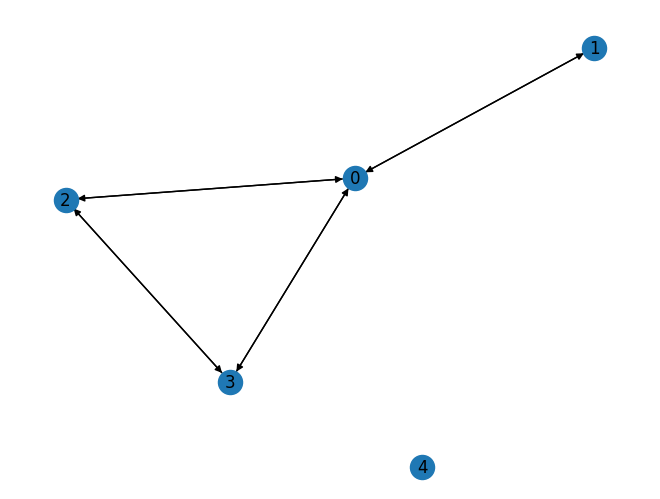

In [25]:
G = nx.DiGraph(J>0)
nx.draw_kamada_kawai(G, with_labels=True)

In [12]:
#input powerset
# ps = powerset(matrix_size)

In [13]:
# # dictionary for fp supports
# supports = {}

# # finding fixed points
# for sigma in ps: # index of entry in power set
#     W = np.copy(A) # weight matrix
#     theta = np.ones((matrix_size, 1)) # theta
#     t_s = np.copy(theta) # theta_sigma
#     # print(ps.index(sigma))
#     deac_neur = ps[ps.index(sigma)] #deactivated neurons
#     if sigma:
#         for iter in deac_neur:
#             W[iter-1, :] = 0
#             inverse = np.linalg.inv(np.identity(matrix_size) - W)   
#             t_s[iter-1, :] = 0
#             P = np.round(np.matmul(inverse, t_s), 4)
#         # print(P)
#         checker = check_fp(A, P, theta, t_s)

#     else:
#         inverse = np.linalg.inv(np.identity(matrix_size) - W)
#         P = np.round(np.matmul(inverse, t_s), 4)
#         # print(P)
#         checker = check_fp(A, P, theta, t_s)

#     if np.all(checker) == True:
#         supports[tuple(np.setdiff1d(np.arange(1, matrix_size+1), deac_neur))] = tuple(P)
#         print(stability(W))
    

# # print(supports)
# # print(W_s)
# print(pd.DataFrame.from_dict(supports, orient='index'))

In [14]:
def sys(t, x):
    # x1, x2 = x
    dxdt = (-x + np.maximum(0, A@x + 1))
    return dxdt


x0 = np.random.rand(matrix_size, 1)
time = [0, 1000]

x = scp.integrate.solve_ivp(sys, time, x0.flatten(), dense_output=True)
t = np.linspace(0,1000, 10001)

# # plot against time
# fig=plt.figure(figsize=(70,6))
# plt.plot(t, (x.sol(t)).T)
# # print(x.sol)
# plt.ylim([-0.1,1.05])

# plt.xlabel('Time')
# plt.ylabel('Firing Rate')

# # Saving File for Feed-Forward Graphs
# # filename1 = 'Graphs and CSVs/Matrix Size ' + str(matrix_size) + ' Symmetry ' + '{:.3f}'.format(symmetry_param)
# # i = 0
# # while os.path.exists(f"{filename1} {i}.png"):
# #     i += 1

# # filename2 = 'Graphs and CSVs/Matrix Size ' + str(matrix_size) + ' Symmetry ' + '{:.3f}'.format(symmetry_param)
# # i = 0
# # while os.path.exists(f"{filename2} {i}.csv"):
# #     i += 1

# # Saving File for Balanced Graphs
# filename1 = 'Graphs and CSVs (Balanced)/Matrix Size ' + str(matrix_size) + ' Symmetry ' + '{:.3f}'.format(symmetry_param) + ' ' + str(p) + ' ' + str(q)
# i = 0
# while os.path.exists(f"{filename1} {i}.png"):
#     i += 1

# # filename2 = 'Graphs and CSVs (Balanced)/Matrix Size ' + str(matrix_size) + ' Symmetry ' + '{:.3f}'.format(symmetry_param) + ' ' + str(p) + ' ' + str(q)
# # i = 0
# # while os.path.exists(f"{filename2} {i}.csv"):
# #     i += 1

# plt.savefig(f"{filename1} {i}.png", dpi=720)

# # corr_mat = pd.DataFrame(W)
# # corr_mat.to_csv(f"{filename2} {i}.csv")

# # plot on phase portrait
# # plt.xlim([0,1])
# # plt.ylim([0,1])
# # plot2 = plt.plot(x.sol(t)[0], x.sol(t)[1])
#     # i=i+1
# plt.show()

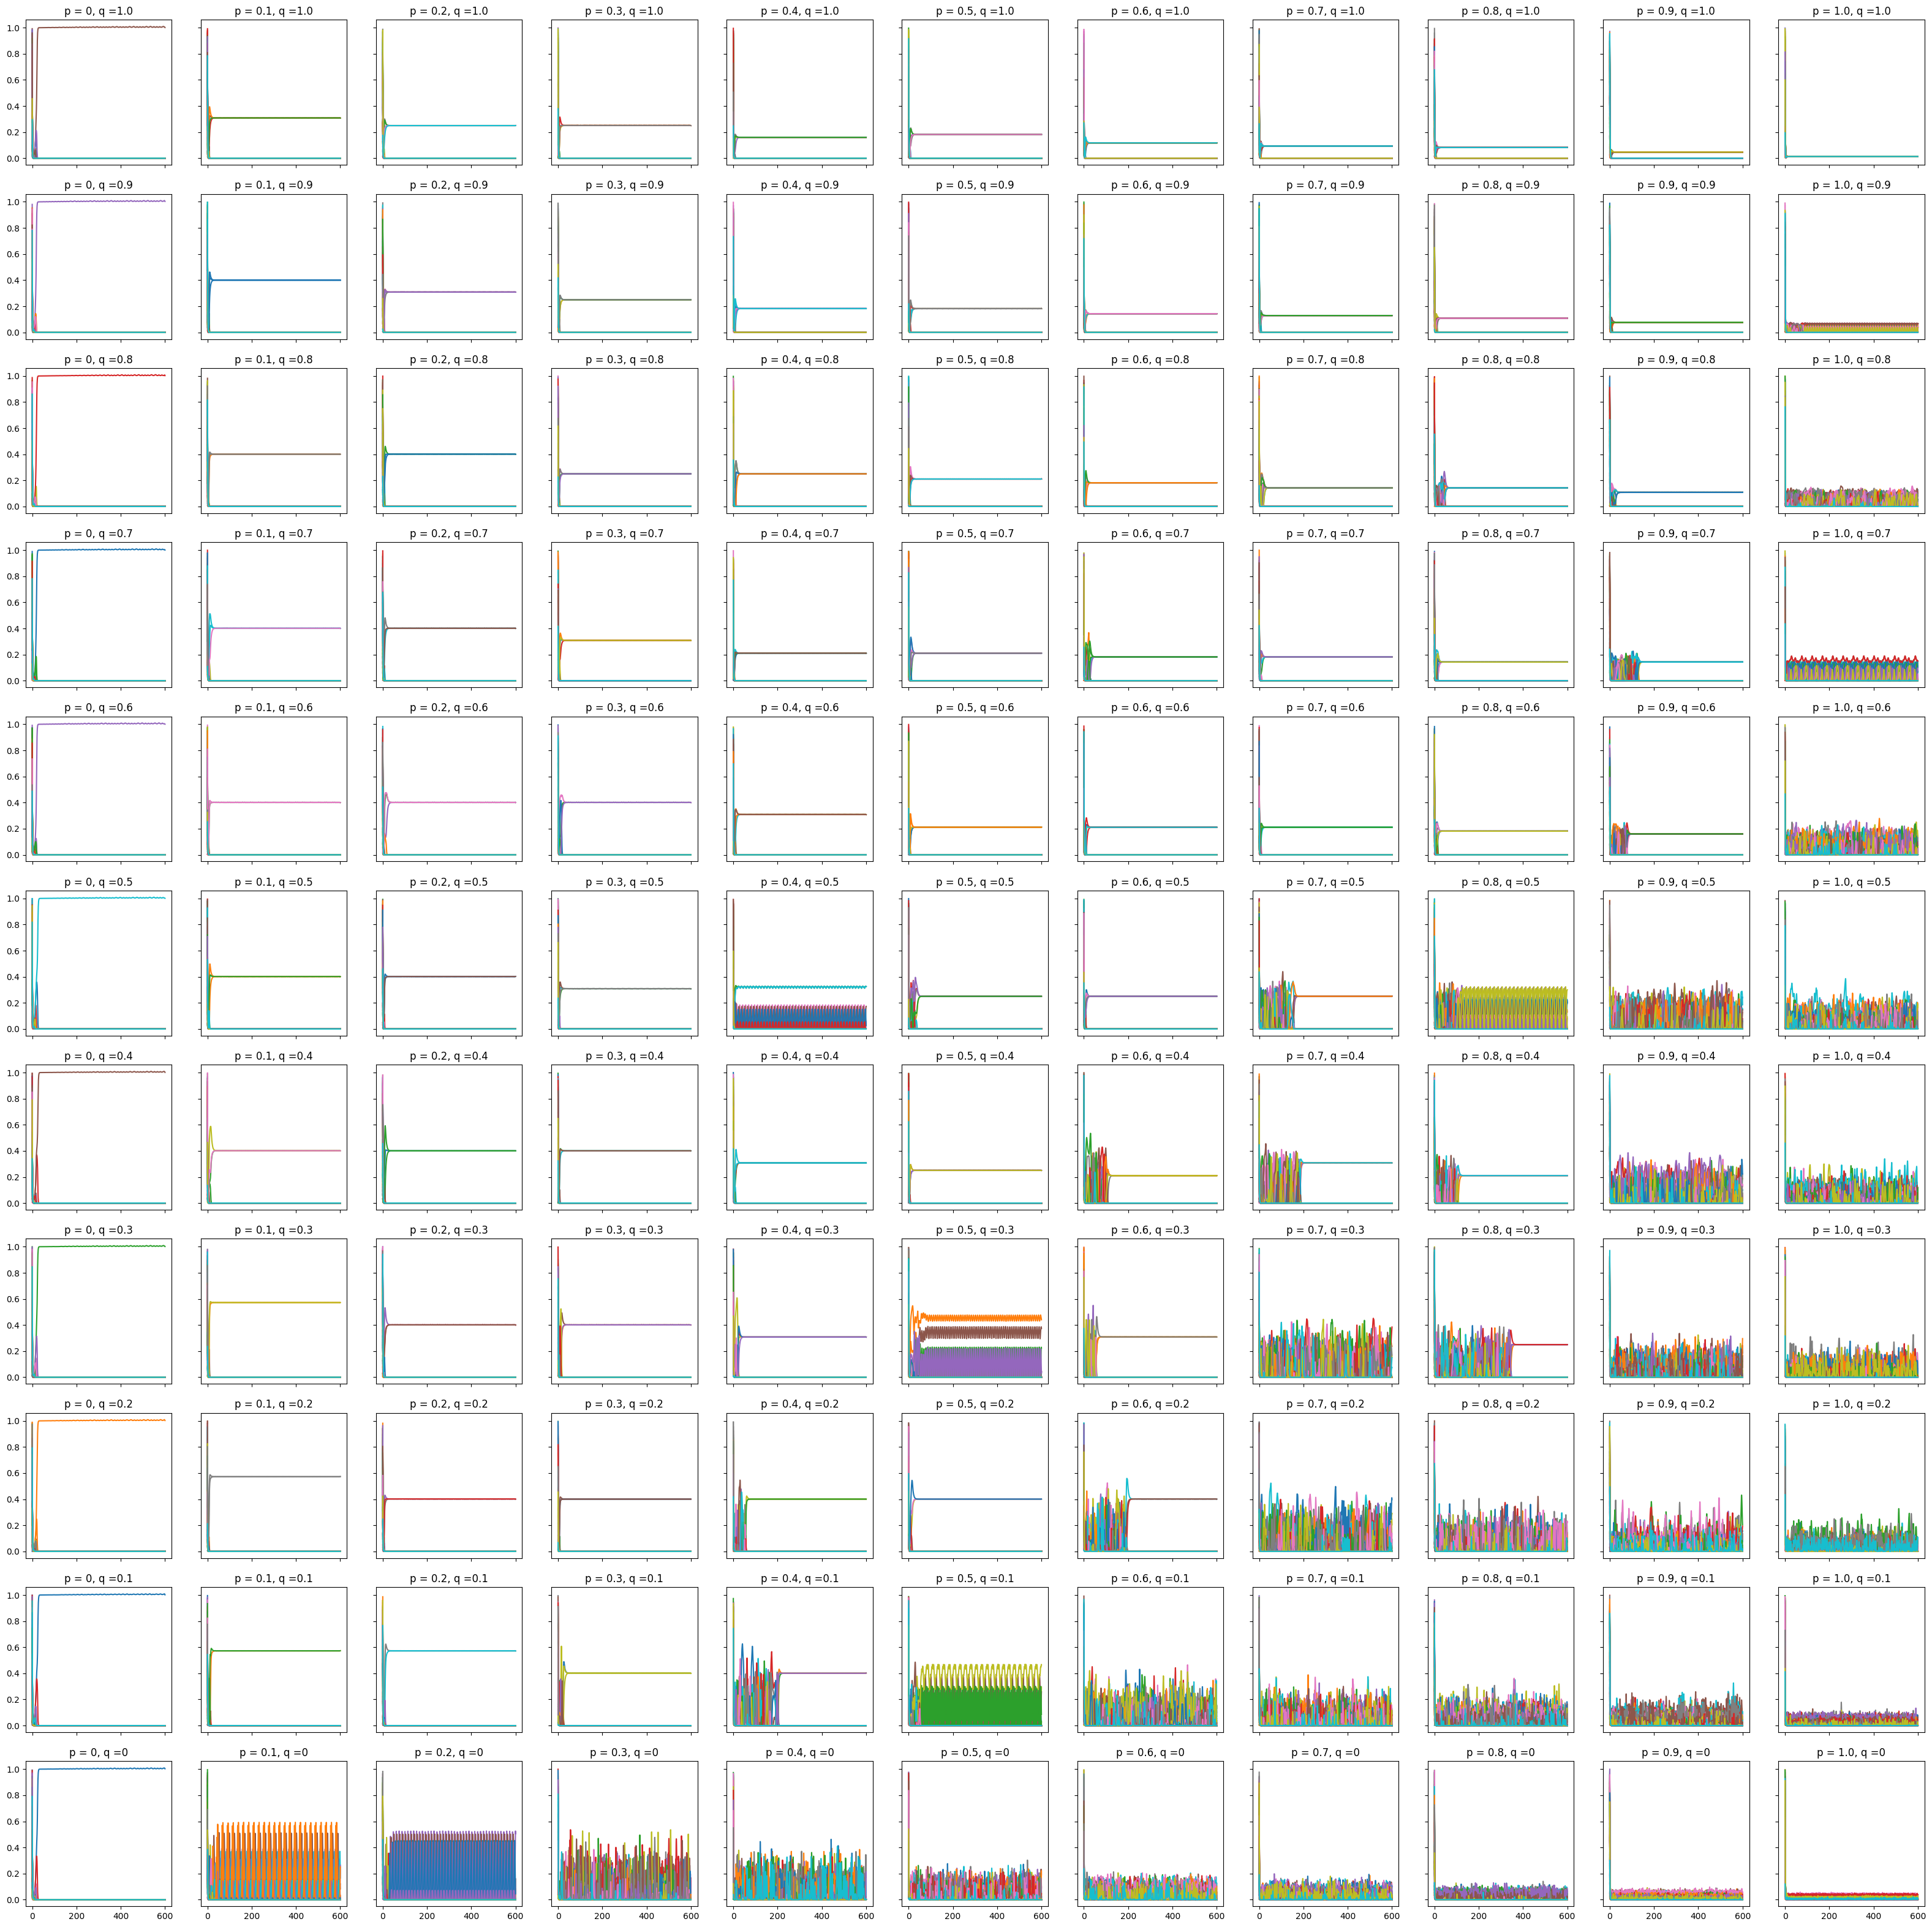

In [4]:
def subplot_gen(mat_size):
    matrix_size = mat_size
    p = 0
    q = 0
    i=0
    fig, axs = plt.subplots(11,11, figsize =(40,40), sharex = True, sharey = True)
    for counter_x in range(0,11):
        q=0
        for counter_y in range(0,11):
            

            # matrix gen
            W = weight_matrix_bal(mat_size,p,q)
            symmetry_param = q
            J = mat_graph(W,mat_size)
            A = np.copy(W)

            # simulating plot
            def sys(t, x):
                dxdt = (-x + np.maximum(0, A@x + 1))
                return dxdt
            x0 = np.random.rand(mat_size, 1)
            time = [0, 600]
            x = scp.integrate.solve_ivp(sys, time, x0.flatten(), dense_output=False)
            # t = np.linspace(0,100, 1001)
            
            # subplot
            u = x.t
            v = (x.y).T
            # fig = plt.figure(1, figsize=(40,40))
            # plt.subplot(11,11,i)
            # plt.plot(u,v)
            # plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
            axs[11-(counter_y+1), counter_x].plot(u,v)
            axs[11-(counter_y+1), counter_x].title.set_text("p = {}, q ={}".format(p,q))
            # print(q)
            q += 0.1
            q = round(q,2)
        p += 0.1
        p = round(p,2)
    plt.savefig(f"sample.png")

subplot_gen(100)

subplots for observing dynamics across intervals

fig,axs = plt.subplots
axs[i,j].plot()

take derivative at t_final, tolerance for numerical error, determine if is fixed point or dynamic attractor 
heat map averaged over multiple trials (different matrices and ICs)

In a purely symmetric graph, how many stable fixed points do you expect?
fp corespond to target free cliques
any target free clique is maximal in symmetric graph


0 0
0 0.1
0 0.2
0 0.3
0 0.4
0 0.5
0 0.6
0 0.7
0 0.8
0 0.9
0 1.0
0.1 0
0.1 0.1
0.1 0.2
0.1 0.3
0.1 0.4
0.1 0.5
0.1 0.6
0.1 0.7
0.1 0.8
0.1 0.9
0.1 1.0
0.2 0
0.2 0.1
0.2 0.2
0.2 0.3
0.2 0.4
0.2 0.5
0.2 0.6
0.2 0.7
0.2 0.8
0.2 0.9
0.2 1.0
0.3 0
0.3 0.1
0.3 0.2
0.3 0.3
0.3 0.4
0.3 0.5
0.3 0.6
0.3 0.7
0.3 0.8
0.3 0.9
0.3 1.0
0.4 0
0.4 0.1
0.4 0.2
0.4 0.3
0.4 0.4
0.4 0.5
0.4 0.6
0.4 0.7
0.4 0.8
0.4 0.9
0.4 1.0
0.5 0
0.5 0.1
0.5 0.2
0.5 0.3
0.5 0.4
0.5 0.5
0.5 0.6
0.5 0.7
0.5 0.8
0.5 0.9
0.5 1.0
0.6 0
0.6 0.1
0.6 0.2
0.6 0.3
0.6 0.4
0.6 0.5
0.6 0.6
0.6 0.7
0.6 0.8
0.6 0.9
0.6 1.0
0.7 0
0.7 0.1
0.7 0.2
0.7 0.3
0.7 0.4
0.7 0.5
0.7 0.6
0.7 0.7
0.7 0.8
0.7 0.9
0.7 1.0
0.8 0
0.8 0.1
0.8 0.2
0.8 0.3
0.8 0.4
0.8 0.5
0.8 0.6
0.8 0.7
0.8 0.8
0.8 0.9
0.8 1.0
0.9 0
0.9 0.1
0.9 0.2
0.9 0.3
0.9 0.4
0.9 0.5
0.9 0.6
0.9 0.7
0.9 0.8
0.9 0.9
0.9 1.0
1.0 0
1.0 0.1
1.0 0.2
1.0 0.3
1.0 0.4
1.0 0.5
1.0 0.6
1.0 0.7
1.0 0.8
1.0 0.9
1.0 1.0
0 0
0 0.1
0 0.2
0 0.3
0 0.4
0 0.5
0 0.6
0 0.7
0 0.8
0 0.9
0 1.0
0.1 0
0.1 0.

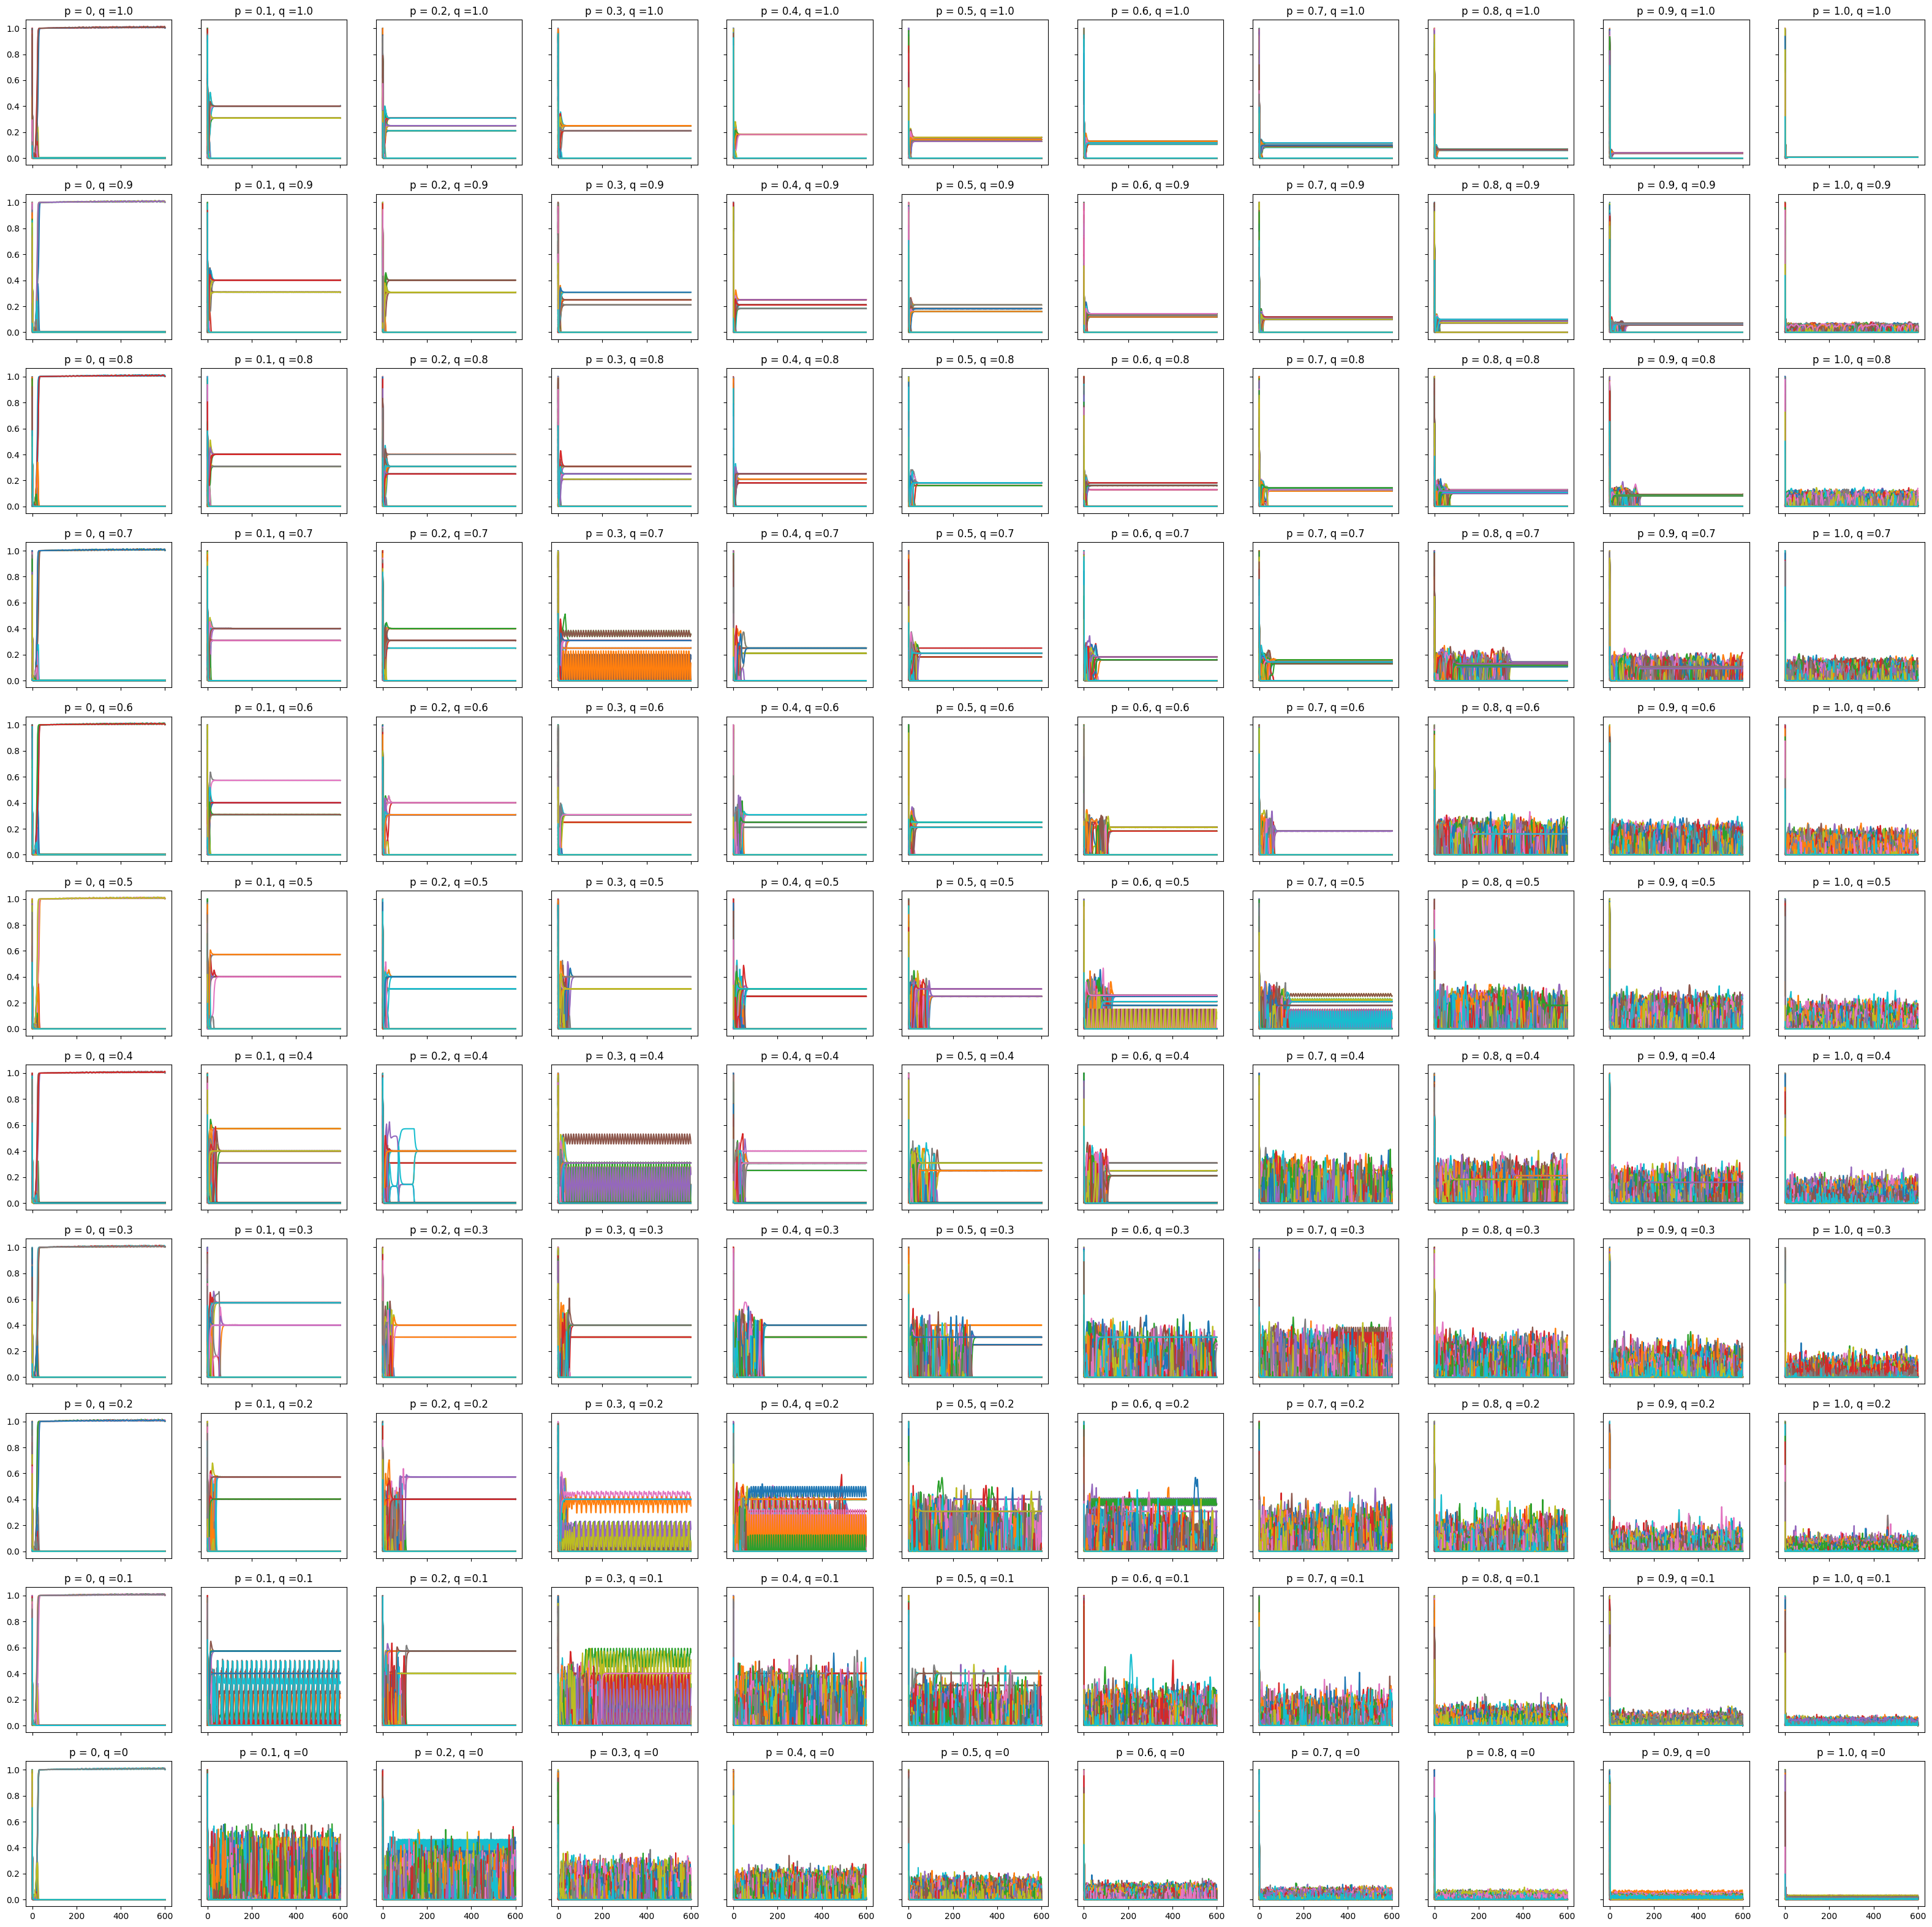

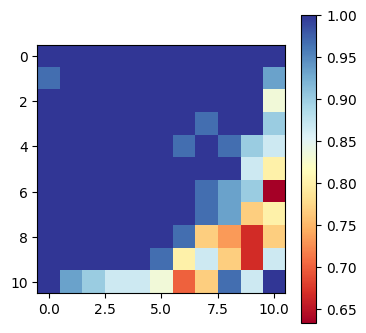

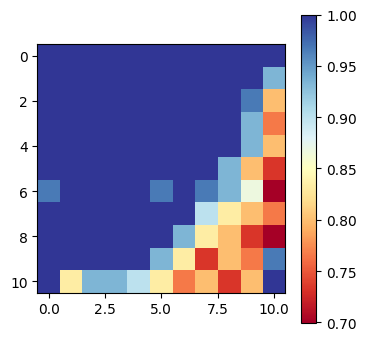

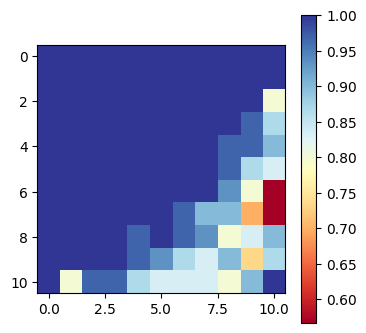

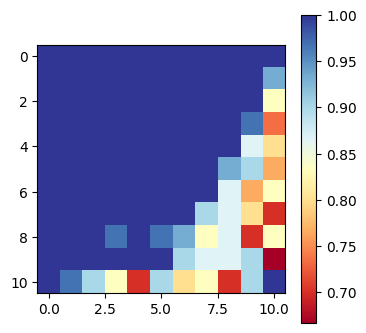

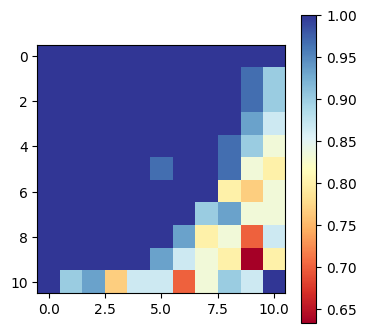

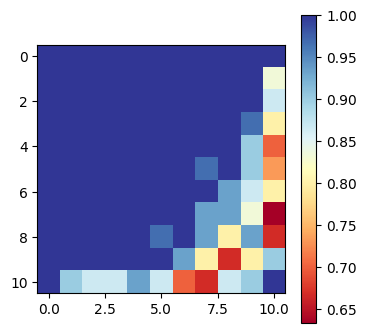

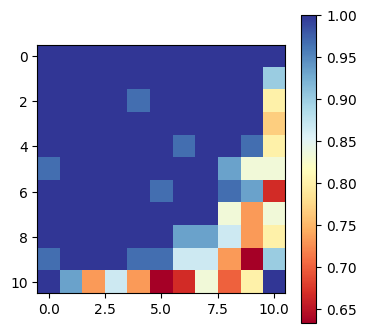

In [3]:
mat_size = 200
param_average = np.zeros((11,11))
p_chart = np.zeros((11,11))
q_chart = np.zeros((11,11))

p = 0
q = 0

fig, axs = plt.subplots(11,11, figsize =(40,40), sharex = True, sharey = True)

for i in range(7):
    p=0
    for counter_x in range(0,11):
        q = 0
        for counter_y in range(0,11):
            trial_close = []
            for i in range(30):
                W = weight_matrix_bal(mat_size,p,q)
                symmetry_param = q
                J = mat_graph(W,mat_size)
                A = np.copy(W)

                def sys(t, x):
                    dxdt = (-x + np.maximum(0, A@x + 1))
                    return dxdt
                x0 = np.random.rand(mat_size, 1)
                time = [0, 600]
                x = scp.integrate.solve_ivp(sys, time, x0.flatten(), dense_output=False)

                for row in x.y:
                    close = []
                    for entry in range(1,25):
                        if abs(row[-1]-row[-entry]) <= 0.01:
                            close.append(1)
                        else:
                            close.append(0)
                    # print(row)
                if st.mean(close) != 1:
                    trial_close.append(0)
                else:
                    trial_close.append(1)
            param_average[11-(counter_y+1), counter_x] = st.mean(trial_close)
            
            # print(trial_close)
            # subplot
            u = x.t
            v = (x.y).T
            # fig = plt.figure(1, figsize=(40,40))
            # plt.subplot(11,11,i)
            # plt.plot(u,v)
            # plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
            axs[11-(counter_y+1), counter_x].plot(u,v)
            axs[11-(counter_y+1), counter_x].title.set_text("p = {}, q ={}".format(p,q))
            print(p,q)

            p_chart[11-(counter_y+1), counter_x] = p
            p_chart[11-(counter_y+1), counter_x] = q

            q += 0.1
            q = round(q,2)
        p += 0.1
        p = round(p,2)
    # print(param_average)

    fig = plt.figure(figsize=(4,4))
    plt.imshow(param_average, cmap = 'RdYlBu')
    plt.colorbar()
    plt.plot()

    # Saving File for Balanced Graphs
    filename1 = 'Heatmaps/Matrix Size ' + str(mat_size)
    i = 0
    while os.path.exists(f"{filename1} {i}.png"):
        i += 1

    plt.savefig(f"{filename1} {i}.png", dpi=720)